In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/belgian_property_prices.csv")

In [3]:
df.head()
df = df.dropna(subset=["lat"])

In [4]:
len(df)

4737

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4737 entries, 0 to 4769
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   as_built_plan                                   2387 non-null   float64
 1   available_as_of                                 3883 non-null   object 
 2   basement                                        2075 non-null   float64
 3   bathrooms                                       4493 non-null   float64
 4   bedroom_1_surface                               3142 non-null   float64
 5   bedroom_2_surface                               3084 non-null   float64
 6   bedroom_3_surface                               2604 non-null   float64
 7   bedrooms                                        4707 non-null   float64
 8   building_condition                              4452 non-null   object 
 9   co2_emission                                  

In [6]:
float_columns = df.select_dtypes(include='float64').columns
int_columns = df.select_dtypes(include="int64").columns


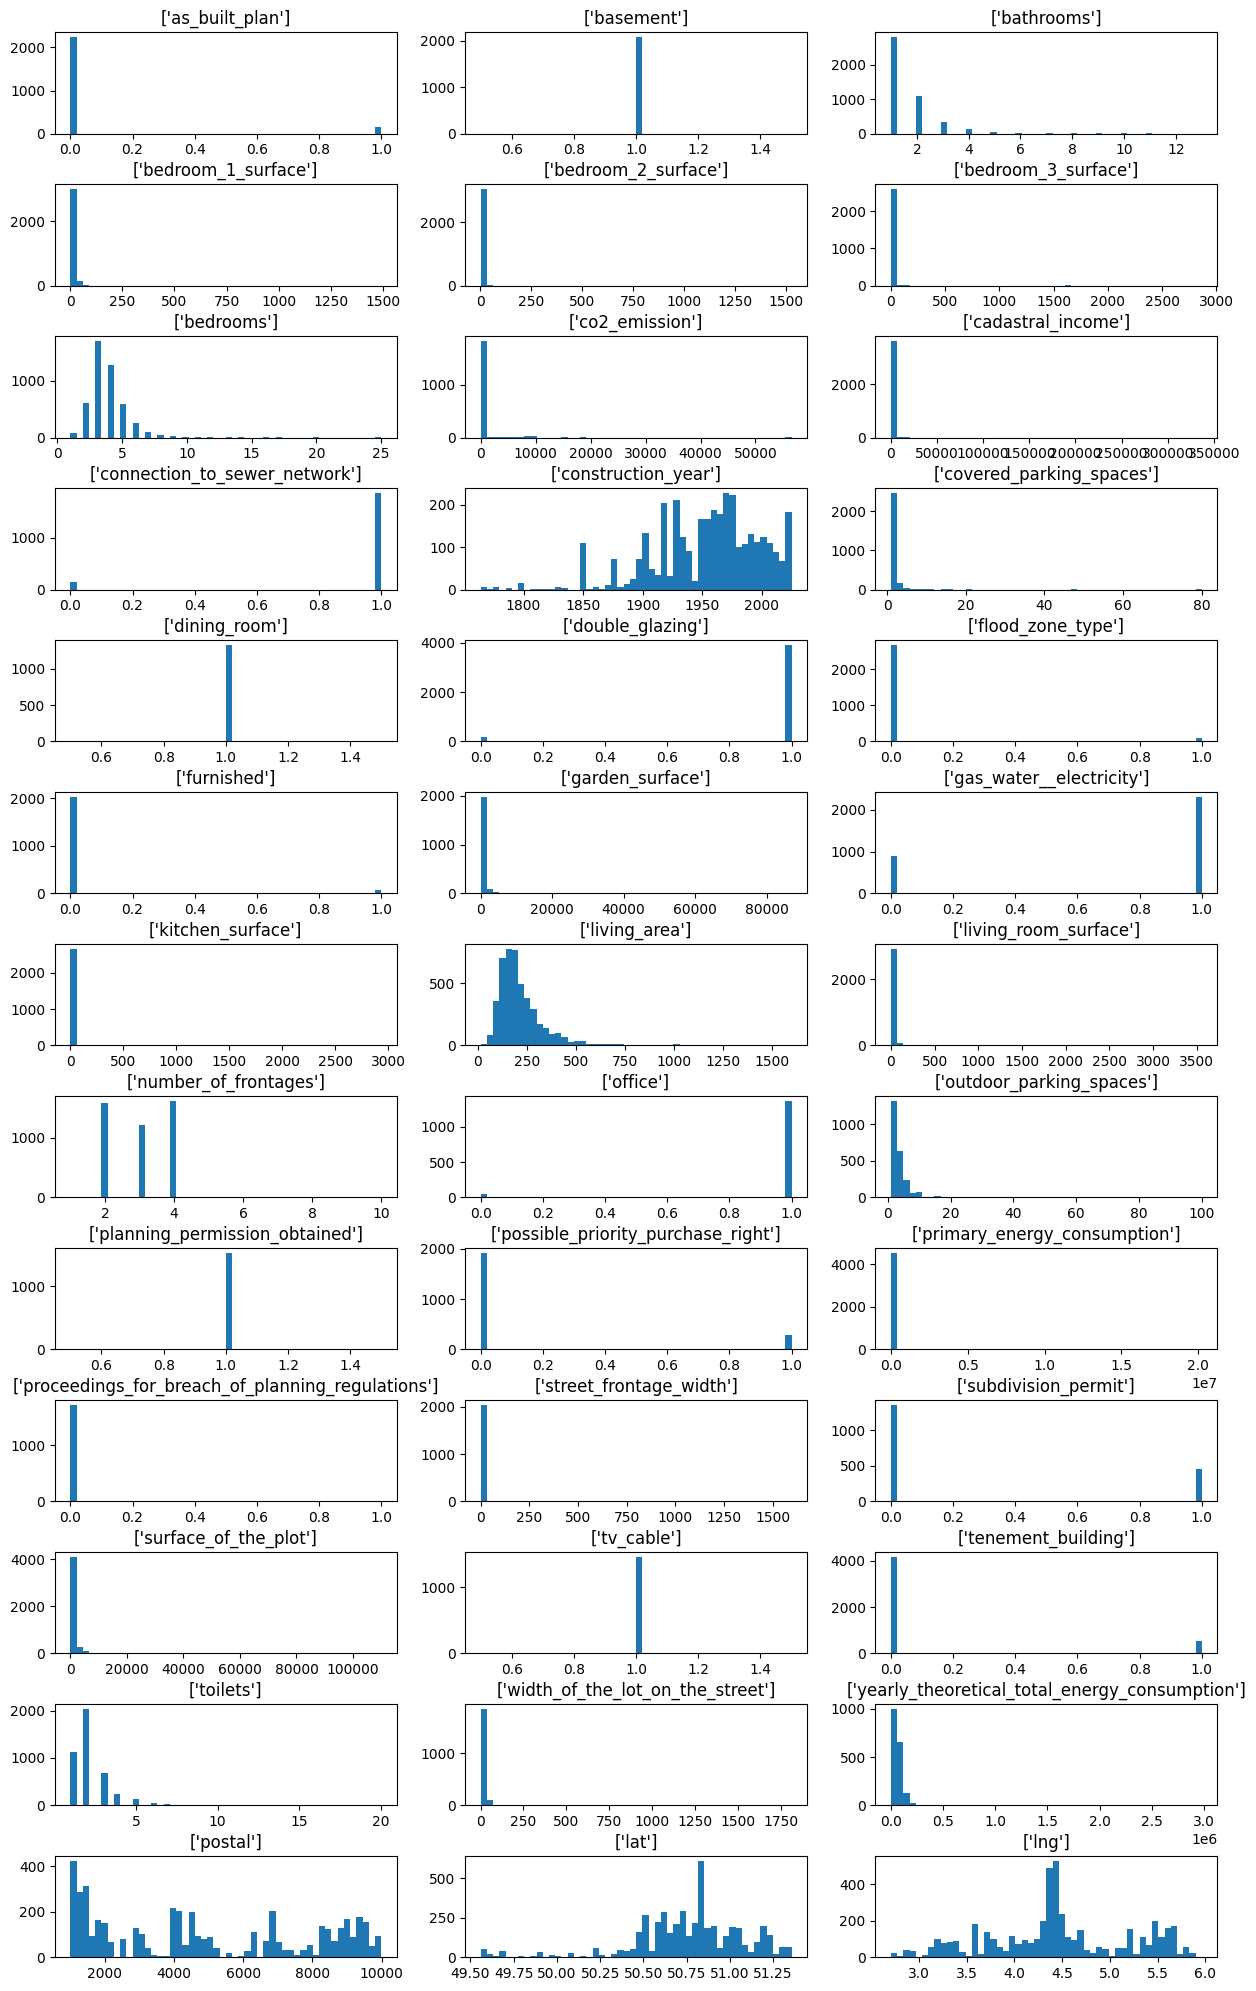

In [7]:
subplot_size = (int(np.ceil(len(float_columns)/3)), 3)
fig, axs = plt.subplots(subplot_size[0], subplot_size[1], figsize=(15,25), gridspec_kw={'hspace': 0.5})

for axis_index, ax in enumerate(axs.flat):
    ax.hist(df[float_columns[axis_index]].values, bins=50)
    ax.set_title([float_columns[axis_index]])

In [8]:
df.website.value_counts()

website
http://www.weinvest.be           134
http://www.immofrancois.be       125
http://www.immobeguin.be/        110
http://www.living-stone.be       105
http://www.latouretpetit.be       95
                                ... 
http://www.deva.be                 1
http://www.justimmo.be             1
http://www.immo-one.eu             1
http://www.immo-tibo.be            1
http://www.imperiavastgoed.be      1
Name: count, Length: 415, dtype: int64

In [9]:
numerical_features = [
    "bathrooms",
    "bedroom_1_surface",
    "bedroom_2_surface",
    "bedroom_3_surface",
    "bedrooms",
    "co2_emission",
    "cadastral_income",
    "construction_year",
    "covered_parking_spaces",
    "garden_surface",
    "kitchen_surface",
    "living_area",
    "living_room_surface",
    "number_of_frontages",
    "outdoor_parking_spaces",
    "primary_energy_consumption",
    "street_frontage_width",
    "surface_of_the_plot",
    "toilets",
    "width_of_the_lot_on_the_street",
    "yearly_theoretical_total_energy_consumption"
    ]

In [10]:
categorical_features = [
    "as_built_plan",
    "basement",
    "connection_to_sewer_network",
    "dining_room",
    "double_glazing",
    "flood_zone_type",
    "furnished",
    "gas_water__electricity",
    "office",
    "planning_permission_obtained",
    "possible_priority_purchase_right",
    "proceedings_for_breach_of_planning_regulations",
    "subdivision_permit",
    "surroundings_type",
    "tv_cable",
    "tenement_building",
    "available_as_of",
    "building_condition"
    ]

In [11]:
location_features = ["lat", "lng", 'postal']

In [12]:
labels = ['price']

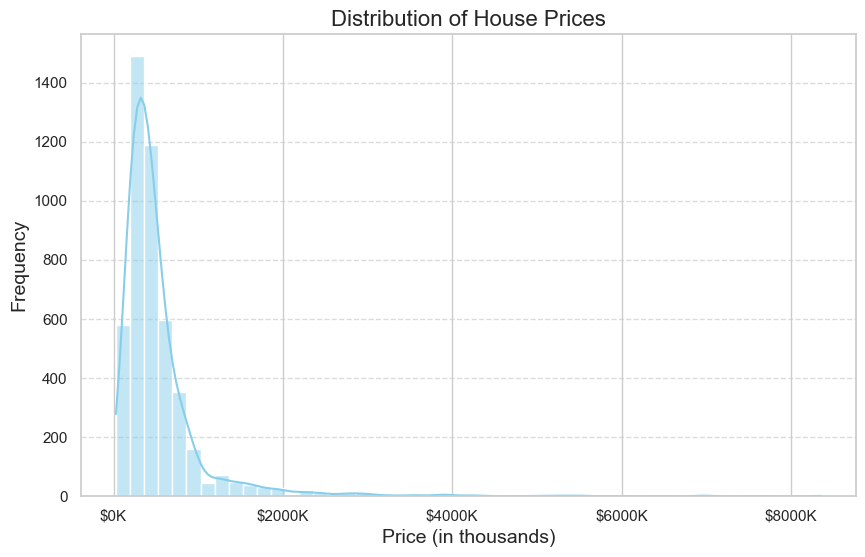

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame

# Set the style
sns.set(style="whitegrid")

# Plot the histogram with seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')

# Define a function to format tick labels in thousands
def thousands_formatter(x, pos):
    return f'${x / 1e3:.0f}K'

# Format the x-axis ticks using the thousands_formatter
formatter = FuncFormatter(thousands_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Title and labels
plt.title("Distribution of house prices", fontsize=16)
plt.xlabel("Price (in thousands)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

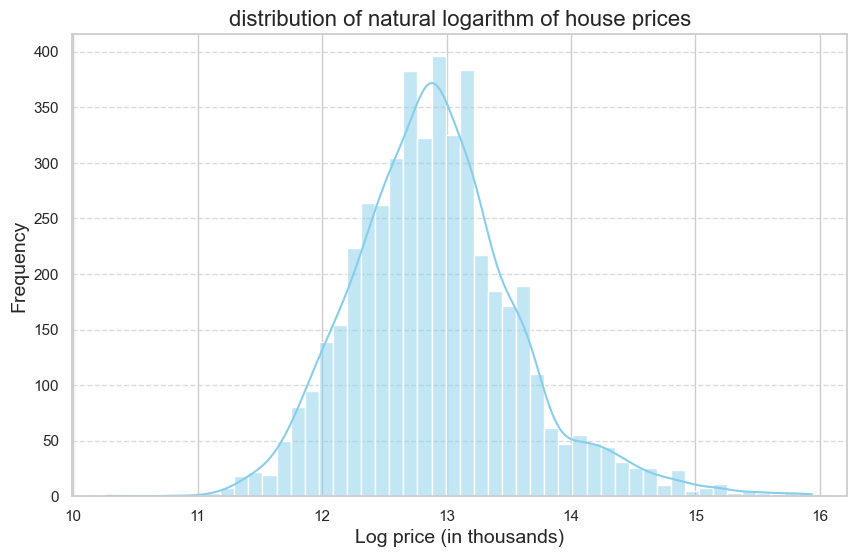

In [17]:
df["price_norm"] = np.log(df.price)
# Set the style
sns.set(style="whitegrid")

# Plot the histogram with seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.histplot(df['price_norm'], bins=50, kde=True, color='skyblue')

# Title and labels
plt.title("distribution of natural logarithm of house prices", fontsize=16)
plt.xlabel("Log price (in thousands)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
df.price.describe()

In [ ]:
df["price_cat"] = pd.cut(df.price, bins=[0,250000,500000,750000,1000000,np.inf], labels=[0,1,2,3,4])

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df.price_cat, random_state=42)

In [ ]:
train_set = train_set.loc[(train_set['outdoor_parking_spaces'] <= 20) | (pd.isna(train_set['outdoor_parking_spaces']))]
train_set = train_set.loc[(train_set['street_frontage_width'] <= 100) | (pd.isna(train_set['street_frontage_width']))]

In [ ]:
train_set.plot(kind="scatter", x="lng", y="lat", grid=True, alpha=0.2, c="price_norm", cmap="jet", colorbar=True, legend=True, sharex= False, figsize=(10,7))
plt.show()

In [ ]:
train_set[numerical_features+labels].corr()

In [ ]:
train_set[numerical_features+labels].corr().price > 0.50

In [ ]:
candidate_attributes = labels + ["toilets", "living_area", "bathrooms"]

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
scatter_matrix(train_set[candidate_attributes], figsize=(12,8))

In [ ]:
train_set.street_frontage_width.value_counts()

In [ ]:
train_set.street_frontage_width.replace(0, np.nan, inplace=True)

In [ ]:
winsorization_candidate_feature = "bedroom_2_surface"
train_set[winsorization_candidate_feature].describe()

In [ ]:
train_set[winsorization_candidate_feature].hist(bins=50)

In [ ]:
train_set[winsorization_candidate_feature].value_counts()

In [ ]:
len(train_set[train_set[winsorization_candidate_feature] > 50])

In [ ]:
train_set[train_set[winsorization_candidate_feature] <= 50][winsorization_candidate_feature].plot.box()

In [ ]:
fig, axs = plt.subplots(len(numerical_features), 4, figsize=(15,35), gridspec_kw={'hspace': 0.5})
from scipy.stats.mstats import winsorize

for feature_index, feature_name in enumerate(numerical_features):
    numerical_feature = train_set[feature_name]
    sqrt_normalization = np.sqrt(numerical_feature)
    cbrt_normalization = np.cbrt(numerical_feature)
    log_normalization = np.log(numerical_feature)

    axs[feature_index][0].hist(numerical_feature, bins=50)
    axs[feature_index][0].set_title(feature_name)

    axs[feature_index][1].hist(sqrt_normalization, bins=50)
    axs[feature_index][1].set_title(f"{feature_name} sqrt")

    axs[feature_index][2].hist(cbrt_normalization, bins=50)
    axs[feature_index][2].set_title(f"{feature_name} cbrt")

    axs[feature_index][3].hist(log_normalization, bins=50)
    axs[feature_index][3].set_title(f"{feature_name} log")    

Features that need outlier trimming:
square root of bathrooms < 3
outdoor_parking_spaces < 20
street_frontage_width < 100
bedroom_1_surface < 60: removed 4 rows and reduced from max value 169 to 60 
bedroom_2_surface < 49: removed 2 rows and reduced from max value 1350 to 49


Features that need square root transformation : bathrooms
Features that need cubic root transformation : 
Features that need log transformation : bedroom_1_surface, bedroom_2_surface

Features that need other transformations: 



In [ ]:
train_set.bedroom_1_surface.value_counts(sort=True)